# 1. INTRODUCCIÓN
En este Notebook trataremos dos ejercicios como modo de afianzar los conceptos sobre modelos de ensamblaje de modelos de árbol de decisión y métodos de búsqueda de hiperparámetros.


*   EJERCICIO COMPLICACIÓN QUIRÚRGICA
*   EJERCICIO CÍTRICOS



## 1.1 Import
Puedes importar aquí las librerías que creas que vas a necesitar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble

## 1.2 Carga el dataset de complicaciones quirúrgicas
Aquí teneis el url del archivo raw del dataset sobre si se da o no una complicación en una operación quirúrgica.

'https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/complicacion_quirurgica.csv'

Importa los datos en un dataframe llamado **dataframe df_operacion**.

In [ ]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/complicacion_quirurgica.csv'

# Importa csv
df_operacion = pd.read_csv(url, sep=',')

# Visualización primeras filas
df_operacion.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


## 1.3 Carga el dataset de naranja-pomelo
Aquí teneis el url del archivo raw del dataset que indica si una fruta es una naranja o un pomelo.

'https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/citrus.csv'

Importa los datos en un dataframe llamado **dataframe df**.

In [ ]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/citrus.csv'

# Importa csv
df = pd.read_csv(url, sep=',')

# Visualización primeras filas
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

# 2. EDA
Para familiarizarte con los datos puedes realizar un pequeño análisis exploratorio visual. Puedes usar los métodos .shape, .info(), .describe(), por ejemplo para entender su tamaño y sus variables.



## 2.1 EDA OPERACIONES

In [ ]:
df_operacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  14635 non-null  float64
 1   Age                  14635 non-null  float64
 2   asa_status           14635 non-null  int64  
 3   baseline_cancer      14635 non-null  int64  
 4   baseline_charlson    14635 non-null  int64  
 5   baseline_cvd         14635 non-null  int64  
 6   baseline_dementia    14635 non-null  int64  
 7   baseline_diabetes    14635 non-null  int64  
 8   baseline_digestive   14635 non-null  int64  
 9   baseline_osteoart    14635 non-null  int64  
 10  baseline_psych       14635 non-null  int64  
 11  baseline_pulmonary   14635 non-null  int64  
 12  ahrq_ccs             14635 non-null  int64  
 13  ccsComplicationRate  14635 non-null  float64
 14  ccsMort30Rate        14635 non-null  float64
 15  complication_rsi     14635 non-null 

In [ ]:
df_operacion.describe()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
count,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,...,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000
mean,31.295642,63.205268,0.632320,0.262316,0.977520,0.620294,0.004851,0.120875,0.189546,0.342740,...,-0.699044,1.606970,0.548890,10.171613,5.915408,1.187086,0.003963,-0.836712,0.919440,0.252135
std,8.152709,18.088191,0.539952,0.439909,1.758355,0.485330,0.069485,0.325993,0.391955,0.474642,...,1.339394,1.497738,0.497621,2.659881,3.239825,1.158357,0.062830,1.194111,0.364663,0.434253
min,2.150000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.720000,0.000000,0.000000,6.070000,0.000000,0.000000,0.000000,-3.820000,0.000000,0.000000
25%,26.510000,51.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.970000,0.000000,0.000000,7.820000,3.000000,0.000000,0.000000,-2.250000,1.000000,0.000000
50%,28.980000,59.700000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.580000,1.000000,1.000000,9.120000,7.000000,1.000000,0.000000,-0.640000,1.000000,0.000000
75%,35.295000,74.700000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,3.000000,1.000000,12.050000,8.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,92.590000,90.000000,2.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.560000,4.000000,1.000000,18.920000,11.000000,3.000000,1.000000,4.400000,2.000000,1.000000


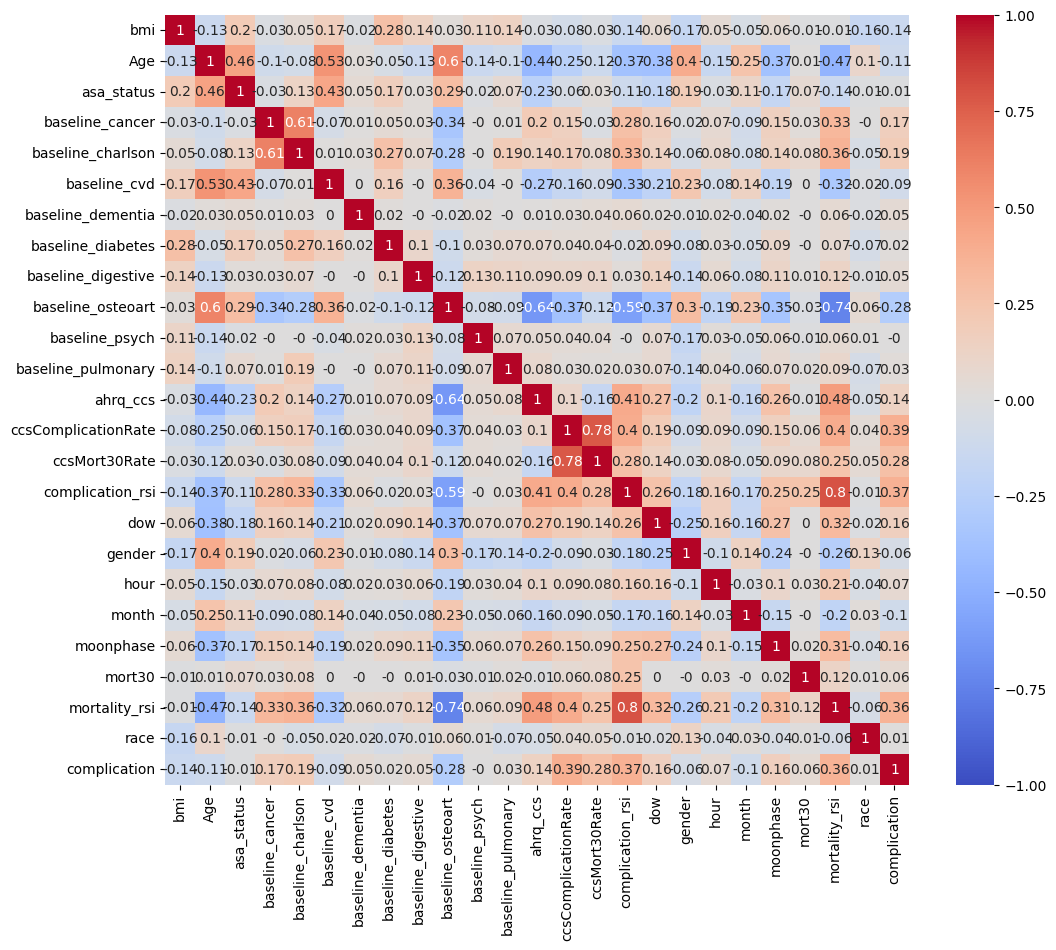

In [ ]:
# Visualización coeficientes Pearson
plt.figure(figsize=(12,10))
sns.heatmap(np.round(df_operacion.corr(),2),
            vmin=-1, vmax=1,
            annot=True, cmap="coolwarm")
plt.show()

## 2.2 EDA CÍTRICOS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


<ipython-input-10-00b38bef77b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(df.corr(),2),


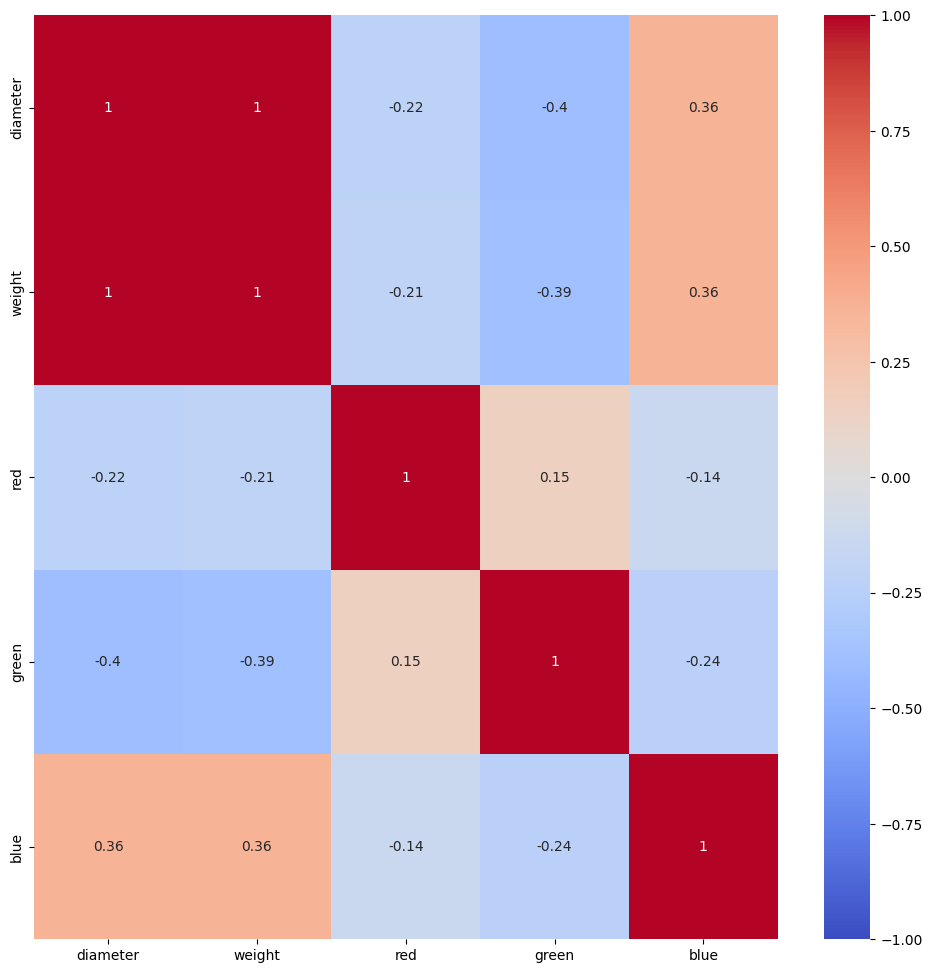

In [ ]:
# Visualización coeficientes Pearson
plt.figure(figsize=(12,12))
sns.heatmap(np.round(df.corr(),2),
            vmin=-1, vmax=1,
            annot=True, cmap="coolwarm")
plt.show()

# 3. Preparación de los datos
Normalmente el dataframe contiene nulos, así como variables categóricas y presencia de ciertas variables que probablemente no queramos usar.

Necesitamos limpiarlo antes de poder entrenar los modelos.

## 3.1 DATASET CÍTRICOS: Preparación de los datos
En este caso tenemos ya presentes sólo variables útiles y no hay nulos. Aún así, hay trabajo que hacer:

### 3.1.1 Dumificación de variables categóricas
El target en este caso!

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True, columns=['name'])

display(len(df))
df.head()

10000

,diameter,weight,red,green,blue,name_orange
0,2.96,86.76,172,85,2,1
1,3.91,88.05,166,78,3,1
2,4.42,95.17,156,81,2,1
3,4.47,95.60,163,81,4,1
4,4.48,95.76,161,72,9,1


### 3.1.2 Train - test

In [ ]:
# Primero generamos la matriz X con las variables predictoras
# y el vector y con la variable a predecir
X = df.drop('name_orange',axis=1)
y = df['name_orange']

# Comprueba sus tamaños
X.shape, y.shape

((10000, 5), (10000,))

In [ ]:
# Haz la partición train-test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=42)

# Comprueba sus tamaños
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6700, 5), (3300, 5), (6700,), (3300,))

## 3.2 Train - test dataset operaciones

In [ ]:
df_operacion.head(2)

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0


In [ ]:
# Primero generamos la matriz X con las variables predictoras
# y el vector y con la variable a predecir
X_operacion = df_operacion.drop('complication',axis=1)
y_operacion = df_operacion['complication']

# Comprueba sus tamaños
X_operacion.shape, y_operacion.shape

((14635, 24), (14635,))

In [ ]:
# Haz la partición train-test
X_op_train, X_op_test, y_op_train, y_op_test = train_test_split(X_operacion, y_operacion,
                                                                test_size=0.33,
                                                                random_state=42)

# Comprueba sus tamaños
X_op_train.shape, X_op_test.shape, y_op_train.shape, y_op_test.shape

((9805, 24), (4830, 24), (9805,), (4830,))

# 4. Función evaluación de modelos


In [ ]:
# Inicializo un modelo (árbol de decisión)
modelo_1 = tree.DecisionTreeClassifier(
    max_depth=3)

In [ ]:
# Entreno el árbol con el set de entrenamiento
modelo_1 = modelo_1.fit(X=X_op_train, y=y_op_train)

In [ ]:
# Ahora, ya entrenado, puedo visualizarlo
print(tree.export_text(modelo_1,
                       feature_names=list(X_op_train.columns)))

|--- ccsComplicationRate <= 0.09
|   |--- Age <= 89.60
|   |   |--- Age <= 75.05
|   |   |   |--- class: 0
|   |   |--- Age >  75.05
|   |   |   |--- class: 1
|   |--- Age >  89.60
|   |   |--- mortality_rsi <= -1.85
|   |   |   |--- class: 0
|   |   |--- mortality_rsi >  -1.85
|   |   |   |--- class: 1
|--- ccsComplicationRate >  0.09
|   |--- Age <= 75.05
|   |   |--- complication_rsi <= 0.27
|   |   |   |--- class: 0
|   |   |--- complication_rsi >  0.27
|   |   |   |--- class: 1
|   |--- Age >  75.05
|   |   |--- class: 1



In [ ]:
# Evaluamos el rendimiento del modelo
y_op_pred_train = modelo_1.predict(X_op_train)

# Calidad predicción train
ac_train = round(accuracy_score(y_op_train, y_op_pred_train), 4)
print('Precisión en set de entrenamiento :', ac_train)

Precisión en set de entrenamiento : 0.8153


In [ ]:
# Uso el árbol para predecir sobre el dataset de test
y_op_pred_test = modelo_1.predict(X_op_test)

# Calidad predicción test
ac_test = round(accuracy_score(y_op_test, y_op_pred_test), 4)
print('Precisión en set de test :', ac_test)

Precisión en set de test : 0.812


In [ ]:
# Degradación de la predicción
print('Degradación: ' + str(round((ac_train-ac_test)/ac_train*100,2)) + '%')

Degradación: 0.4%


## 4.1 Función

In [ ]:
def entrenar_modelo_y_predecir(modelo, X_train, X_test, y_train, y_test):
  """
  Función que entrena un modelo ya inicializado y evalua su calidad en el set
  de entrenamiento y de test, indicando la degradación en este.
  """
  # Entreno el árbol con el set de entrenamiento
  modelo = modelo.fit(X=X_train, y=y_train)
  # Uso el árbol para predecir sobre el dataset de entrenamiento
  y_pred_train = modelo.predict(X_train)
  # Uso el árbol para predecir sobre el dataset de test
  y_pred_test = modelo.predict(X_test)
  # Calidad predicción train
  ac_train = round(accuracy_score(y_train, y_pred_train), 4)
  print('Precisión en set de entrenamiento :', ac_train)
  # Calidad predicción test
  ac_test = round(accuracy_score(y_test, y_pred_test), 4)
  print('Precisión en set de test :', ac_test)
  # Degradación de la predicción
  print('Degradación: ' + str(round((ac_train-ac_test)/ac_train*100,2)) + '%')

In [ ]:
# Inicializo un modelo (árbol de decisión)
modelo_1 = tree.DecisionTreeClassifier(
    max_depth=5)

entrenar_modelo_y_predecir(modelo_1, X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.8264
Precisión en set de test : 0.8259
Degradación: 0.06%


# 5. Random Forest
Documentación sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## 5.1 OPERACIÓN

In [ ]:
# Define el modelo de Random Forest
modelo_RF_operacion = ensemble.RandomForestClassifier(
    n_estimators = 100)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_operacion,
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 1.0
Precisión en set de test : 0.8615
Degradación: 13.85%


In [ ]:
# Define el modelo de Random Forest
modelo_RF_operacion = ensemble.RandomForestClassifier(
    n_estimators = 100,
    max_features = "auto",
    min_samples_split = 10)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_operacion,
                           X_op_train, X_op_test, y_op_train, y_op_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Precisión en set de entrenamiento : 0.9574
Precisión en set de test : 0.8563
Degradación: 10.56%


In [ ]:
# Define el modelo de Random Forest
modelo_RF_operacion = ensemble.RandomForestClassifier(
    n_estimators = 100,
    max_features = "auto",
    min_samples_split = 35,
    min_samples_leaf = 3)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_operacion,
                           X_op_train, X_op_test, y_op_train, y_op_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Precisión en set de entrenamiento : 0.8892
Precisión en set de test : 0.8447
Degradación: 5.0%


## 5.2 CÍTRICO

In [ ]:
# Define el modelo de Random Forest
modelo_RF_citrico = ensemble.RandomForestClassifier(
    n_estimators = 100)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_citrico,
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 1.0
Precisión en set de test : 0.9512
Degradación: 4.88%


In [ ]:
# Define el modelo de Random Forest
modelo_RF_citrico = ensemble.RandomForestClassifier(
    n_estimators = 100,
    min_samples_split = 5)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_citrico,
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.9958
Precisión en set de test : 0.9521
Degradación: 4.39%


# 6. Gradient Boosting
Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html.

## 6.1 OPERACIÓN

In [ ]:
modelo_GB_operacion = ensemble.GradientBoostingClassifier(
    n_estimators = 100,
    learning_rate = 0.1)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_GB_operacion,
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9169
Precisión en set de test : 0.9097
Degradación: 0.79%


In [ ]:
modelo_GB_operacion = ensemble.GradientBoostingClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 7)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_GB_operacion,
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9656
Precisión en set de test : 0.9101
Degradación: 5.75%


## 6.2 CÍTRICOS

In [ ]:
modelo_GB_citrico = ensemble.GradientBoostingClassifier(
    n_estimators = 100)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_GB_citrico,
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.9581
Precisión en set de test : 0.9445
Degradación: 1.42%


In [ ]:
modelo_GB_citrico = ensemble.GradientBoostingClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 7)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_GB_citrico,
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.999
Precisión en set de test : 0.9748
Degradación: 2.42%


# 7. ADABoost
Parámetros: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

## 7.1 OPERACIÓN

In [ ]:
modelo_ADA_operacion = ensemble.AdaBoostClassifier()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_ADA_operacion,
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.893
Precisión en set de test : 0.8909
Degradación: 0.24%


In [ ]:
modelo_ADA_operacion = ensemble.AdaBoostClassifier(
    n_estimators=1000)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_ADA_operacion,
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9096
Precisión en set de test : 0.893
Degradación: 1.82%


## 7.2 CÍTRICOS

In [ ]:
modelo_ADA_citrico = ensemble.AdaBoostClassifier()

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_ADA_citrico,
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.9385
Precisión en set de test : 0.9352
Degradación: 0.35%


# 8. XGBoost
Definición de los parámetros: https://xgboost.readthedocs.io/en/latest/parameter.html.

In [ ]:
from xgboost import XGBClassifier

## 8.1 OPERACIÓN

In [ ]:
modelo_XGB_operacion = XGBClassifier()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_operacion,
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9818
Precisión en set de test : 0.9097
Degradación: 7.34%


In [ ]:
modelo_XGB_operacion = XGBClassifier(
    n_estimators = 200)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_operacion,
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9994
Precisión en set de test : 0.9066
Degradación: 9.29%


In [ ]:
modelo_XGB_operacion = XGBClassifier(
    n_estimators = 200,
    max_depth = 6)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_operacion,
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9994
Precisión en set de test : 0.9066
Degradación: 9.29%


## 8.2 CÍTRICOS

In [ ]:
# Menos overfitting y menos rendimiento
modelo_XGB_citrico = XGBClassifier()

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_XGB_citrico,
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.9973
Precisión en set de test : 0.9821
Degradación: 1.52%


In [ ]:
# Más overfitting y más rendimiento
modelo_XGB_citrico = XGBClassifier(
    n_estimators=125,
    max_depth=4)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_XGB_citrico,
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.9955
Precisión en set de test : 0.9806
Degradación: 1.5%


# 9. Stacking
Hay maneras de automatizar la creación de modelos con stacking. Por ahora no vamos a centrarnos en eso sino en la lógica detrás del stacking, por lo que realizaremos modelos de stacking a mano paso a paso.

- 1 Entrenar varios modelos de manera independiente (es lo que hemos venido haciendo en secciones anteriores)
- 2 Realizar predicciones con los distintos modelos
- 3 Entrenar un nuevo modelo que use las predicciones de los anteriores como variables

## 9.1 OPERACIÓN

### 9.1.1 Predicción con modelos anteriores

In [ ]:
diccionario_modelos = {
    'Random Forest': modelo_RF_operacion,
    'Gradient Boosting': modelo_GB_operacion,
    'ADABoost': modelo_ADA_operacion,
    'XGBoost': modelo_XGB_operacion
}

X_STACKING_train_operaciones = pd.DataFrame()
X_STACKING_test_operaciones = pd.DataFrame()

for modelo in diccionario_modelos.keys():
  print(modelo)
  X_STACKING_train_operaciones[modelo] = diccionario_modelos[modelo].predict(X_op_train)
  X_STACKING_test_operaciones[modelo] = diccionario_modelos[modelo].predict(X_op_test)

X_STACKING_train_operaciones.head()

Random Forest
Gradient Boosting
ADABoost
XGBoost


,Random Forest,Gradient Boosting,ADABoost,XGBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


### 9.1.2 Entrenamiento y predicción de metamodelo

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
metamodelo_operaciones = LogisticRegression()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(metamodelo_operaciones,
                           X_STACKING_train_operaciones, X_STACKING_test_operaciones, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9994
Precisión en set de test : 0.9066
Degradación: 9.29%


In [ ]:
metamodelo_operaciones_arbol = tree.DecisionTreeClassifier(
    max_depth=5)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(metamodelo_operaciones_arbol,
                           X_STACKING_train_operaciones, X_STACKING_test_operaciones, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9994
Precisión en set de test : 0.9066
Degradación: 9.29%


In [ ]:
# Modelos individuales
for modelo in diccionario_modelos.keys():
  print(modelo)
  entrenar_modelo_y_predecir(diccionario_modelos[modelo],
                             X_op_train, X_op_test, y_op_train, y_op_test)

Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Precisión en set de entrenamiento : 0.8963
Precisión en set de test : 0.8513
Degradación: 5.02%
Gradient Boosting
Precisión en set de entrenamiento : 0.9656
Precisión en set de test : 0.9106
Degradación: 5.7%
ADABoost
Precisión en set de entrenamiento : 0.9096
Precisión en set de test : 0.893
Degradación: 1.82%
XGBoost
Precisión en set de entrenamiento : 0.9994
Precisión en set de test : 0.9066
Degradación: 9.29%


In [ ]:
# Ahora, ya entrenado, puedo visualizarlo
print(tree.export_text(metamodelo_operaciones_arbol,
                       feature_names=list(X_STACKING_train_operaciones.columns)))

|--- XGBoost <= 0.50
|   |--- ADABoost <= 0.50
|   |   |--- Random Forest <= 0.50
|   |   |   |--- class: 0
|   |   |--- Random Forest >  0.50
|   |   |   |--- class: 0
|   |--- ADABoost >  0.50
|   |   |--- class: 0
|--- XGBoost >  0.50
|   |--- class: 1



## 9.2 CÍTRICOS

### 9.2.1 Predicción con modelos anteriores

In [ ]:
diccionario_modelos = {
    'Random Forest': modelo_RF_citrico,
    'Gradient Boosting': modelo_GB_citrico,
    'ADABoost': modelo_ADA_citrico,
    'XGBoost': modelo_XGB_citrico
}

X_STACKING_train_citrico = pd.DataFrame()
X_STACKING_test_citrico = pd.DataFrame()

for modelo in diccionario_modelos.keys():
  print(modelo)
  X_STACKING_train_citrico[modelo] = diccionario_modelos[modelo].predict(X_train)
  X_STACKING_test_citrico[modelo] = diccionario_modelos[modelo].predict(X_test)

X_STACKING_train_citrico.head()

Random Forest
Gradient Boosting
ADABoost
XGBoost


,Random Forest,Gradient Boosting,ADABoost,XGBoost
0,0,0,0,0
1,0,0,1,0
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0


### 9.2.2 Entrenamiento y predicción de metamodelo

In [ ]:
metamodelo_citrico = LogisticRegression()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(metamodelo_citrico,
                           X_STACKING_train_citrico, X_STACKING_test_citrico, y_train, y_test)

Precisión en set de entrenamiento : 0.999
Precisión en set de test : 0.9745
Degradación: 2.45%


In [ ]:
metamodelo_citrico_arbol = tree.DecisionTreeClassifier()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(metamodelo_citrico_arbol,
                           X_STACKING_train_citrico, X_STACKING_test_citrico, y_train, y_test)

Precisión en set de entrenamiento : 0.9993
Precisión en set de test : 0.9779
Degradación: 2.14%


In [ ]:
# Modelos individuales
for modelo in diccionario_modelos.keys():
  print(modelo)
  entrenar_modelo_y_predecir(diccionario_modelos[modelo],
                             X_train, X_test, y_train, y_test)

Random Forest
Precisión en set de entrenamiento : 0.9963
Precisión en set de test : 0.9494
Degradación: 4.71%
Gradient Boosting
Precisión en set de entrenamiento : 0.9994
Precisión en set de test : 0.977
Degradación: 2.24%
ADABoost
Precisión en set de entrenamiento : 0.9385
Precisión en set de test : 0.9352
Degradación: 0.35%
XGBoost
Precisión en set de entrenamiento : 0.9955
Precisión en set de test : 0.9806
Degradación: 1.5%


In [ ]:
# Ahora, ya entrenado, puedo visualizarlo
print(tree.export_text(metamodelo_citrico_arbol,
                       feature_names=list(X_STACKING_train_citrico.columns)))

|--- Gradient Boosting <= 0.50
|   |--- Random Forest <= 0.50
|   |   |--- XGBoost <= 0.50
|   |   |   |--- ADABoost <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- ADABoost >  0.50
|   |   |   |   |--- class: 0
|   |   |--- XGBoost >  0.50
|   |   |   |--- ADABoost <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- ADABoost >  0.50
|   |   |   |   |--- class: 0
|   |--- Random Forest >  0.50
|   |   |--- ADABoost <= 0.50
|   |   |   |--- XGBoost <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- XGBoost >  0.50
|   |   |   |   |--- class: 1
|   |   |--- ADABoost >  0.50
|   |   |   |--- class: 0
|--- Gradient Boosting >  0.50
|   |--- class: 1



# 10 Selección automática de hiperparámetros

## 10.01 Grid Search
Documentación scklearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Diccionario con parámetros que queremos probar
parameters = {'n_estimators': [100, 200],
              'min_samples_split': [5, 10, 20],
              'max_depth': [5,20, None]}

# Se crea objeto GridSearch
RF_GSCV = GridSearchCV(
    estimator = ensemble.RandomForestClassifier(),
    param_grid = parameters)

RF_GSCV

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 20, None],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100, 200]})

In [ ]:
# Se entrena el objeto GridSearch
RF_GSCV.fit(X_op_train, y_op_train)

RF_GSCV

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 20, None],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100, 200]})

In [ ]:
RF_GSCV.cv_results_

{'mean_fit_time': array([0.53423839, 1.03493257, 0.67302518, 1.0208149 , 0.52415605,
        1.18245211, 1.0462101 , 2.24783216, 1.15063953, 2.11160703,
        0.96024232, 2.0142159 , 1.05689826, 2.26365075, 1.14777865,
        2.17269225, 0.95012064, 2.04470682]),
 'std_fit_time': array([0.01325531, 0.01109241, 0.0993569 , 0.00698962, 0.00999376,
        0.19616638, 0.00747463, 0.23014489, 0.19058737, 0.26082986,
        0.03666816, 0.18022636, 0.01821663, 0.18909467, 0.16857422,
        0.2963925 , 0.01331355, 0.19840928]),
 'mean_score_time': array([0.02562318, 0.04597878, 0.03162098, 0.04533911, 0.02462335,
        0.05275626, 0.04512382, 0.09236412, 0.04577646, 0.09035964,
        0.04016266, 0.08056865, 0.04615903, 0.09287076, 0.0449059 ,
        0.08196912, 0.04159369, 0.08300776]),
 'std_score_time': array([0.00291126, 0.00225742, 0.00531898, 0.00139117, 0.00118263,
        0.00858169, 0.00095289, 0.01197279, 0.00560204, 0.01484058,
        0.00055864, 0.00664939, 0.00171061, 

In [ ]:
RF_GSCV.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

## 10.02 EJEMPLO: Modelo Operaciones
Encuentra los mejores hiperparámetros posibles para el modelo de XGBoost que predice las complicaciones en una operación utilizando Grid Search:

In [ ]:
# Diccionario con parámetros que queremos probar
parameters = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.3, 0.1],
              'max_depth': [5,20],
              'reg_alpha': [0, 1, 10]}

# Se crea objeto GridSearch
XGB_GSCV = GridSearchCV(
    estimator = XGBClassifier(),
    param_grid = parameters)

XGB_GSCV

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.3, 0.1], 'max_depth': [5, 20],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 1, 10]})

In [ ]:
# Se entrena el objeto GridSearch
XGB_GSCV.fit(X_op_train, y_op_train)

XGB_GSCV

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.3, 0.1], 'max_depth': [5, 20],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 1, 10]})

In [ ]:
XGB_GSCV.cv_results_

{'mean_fit_time': array([0.18586111, 0.18715262, 0.13090663, 0.31744051, 0.66705866,
        0.17850986, 0.43212166, 0.47677417, 0.22115893, 0.47599459,
        0.82522664, 0.19057932, 0.65585203, 0.62248783, 0.4887393 ,
        0.91341786, 0.68670011, 0.30510406, 0.33813162, 0.37045989,
        0.18483238, 0.30927191, 0.33108997, 0.25056376, 0.43936019,
        0.79345307, 0.3009882 , 0.74861369, 0.75776072, 0.70772066,
        1.10702138, 1.51618428, 0.45880637, 1.70325384, 1.47566328,
        0.82955537]),
 'std_fit_time': array([0.01004143, 0.01118544, 0.01017297, 0.01198124, 0.43549996,
        0.01106592, 0.01725064, 0.02038764, 0.01616603, 0.0134201 ,
        0.42871272, 0.01808699, 0.01102543, 0.03018053, 0.22891928,
        0.14676592, 0.02521169, 0.01686099, 0.17573006, 0.23421257,
        0.01214541, 0.01431929, 0.01975259, 0.01589408, 0.00783925,
        0.47330137, 0.0160569 , 0.01779767, 0.01743586, 0.38074245,
        0.01825482, 0.50692069, 0.03109428, 0.61934743, 0.025

In [ ]:
XGB_GSCV.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 1}

In [ ]:
modelo_XGB_operacion = XGBClassifier()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_operacion,
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9818
Precisión en set de test : 0.9097
Degradación: 7.34%


In [ ]:
modelo_XGB_operacion = XGBClassifier(
    n_estimators= 200,
    learning_rate= 0.1,
    max_depth= 5,
    reg_alpha= 10
)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_operacion,
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9193
Precisión en set de test : 0.9087
Degradación: 1.15%


## 10.03 EJERCICIO: Modelo Cítricos
Encuentra los mejores hiperparámetros posibles para el modelo de Gradient Boosting de cítricos:

In [ ]:
# Diccionario con parámetros que queremos probar
parameters = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.3, 0.1],
              'max_depth': [5,10,20]}

# Se crea objeto GridSearch
GB_GSCV = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(),
    param_grid = parameters)

GB_GSCV

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.1], 'max_depth': [5, 10, 20],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# Se entrena el objeto GridSearch
GB_GSCV.fit(X_train, y_train)

GB_GSCV

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.1], 'max_depth': [5, 10, 20],
                         'n_estimators': [100, 200, 300]})

In [ ]:
GB_GSCV.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300}

In [ ]:
modelo_GB_citrico = ensemble.GradientBoostingClassifier(
    n_estimators = 100)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_GB_citrico,
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.9581
Precisión en set de test : 0.9445
Degradación: 1.42%


In [ ]:
modelo_GB_citrico = ensemble.GradientBoostingClassifier(
    n_estimators = 300,
    max_depth = 5,
    learning_rate = 0.3)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_GB_citrico,
                           X_train, X_test, y_train, y_test)